 # Making Noise

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib widget

In [2]:
simple_noise = np.random.rand(200,200)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
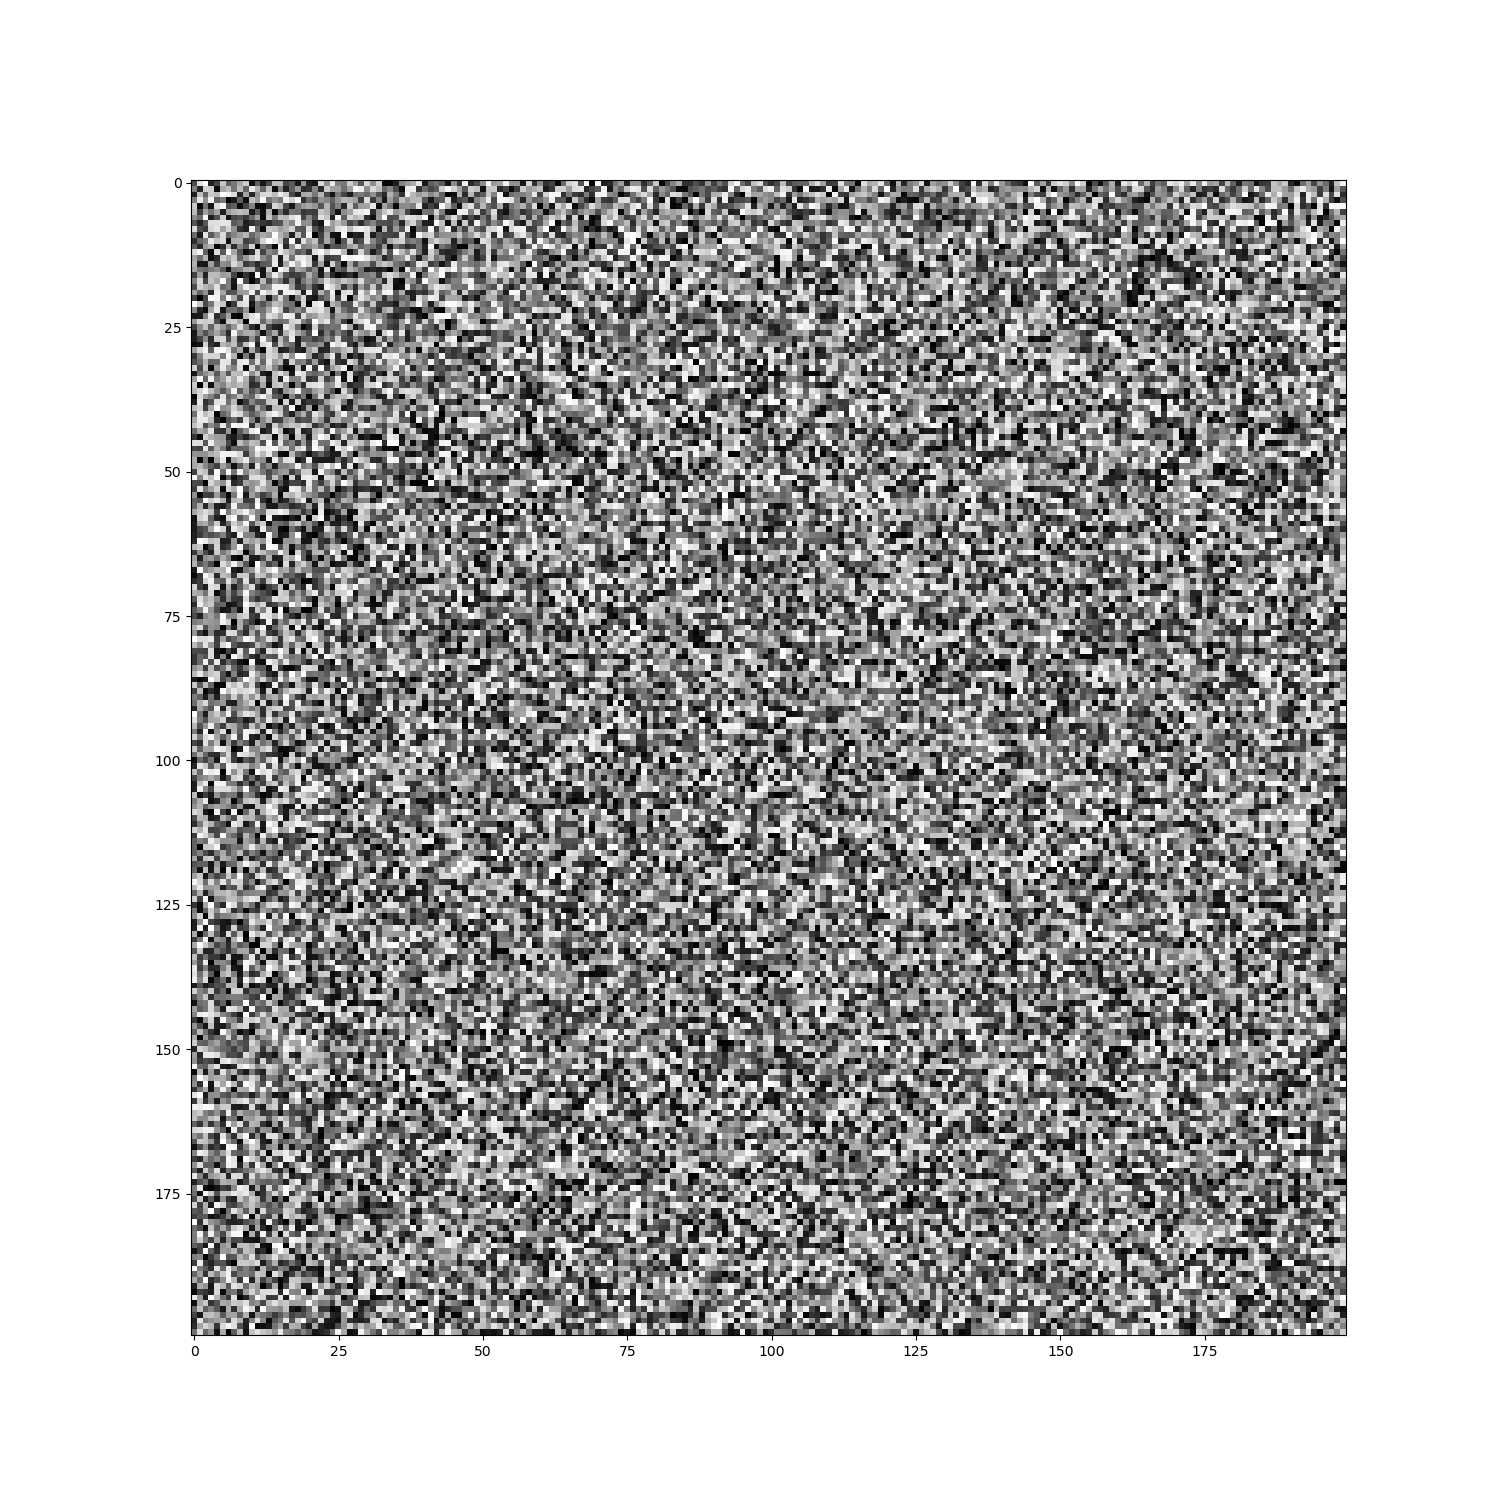

In [3]:
plt.figure(figsize=(15,15))
plt.imshow(simple_noise,cmap='gray')

In [4]:
# lets make SOME noise
import os
names = []
for i in range(50):
  simple_noise = np.random.rand(500,500)
  name = "noise"+str(i)+".png"
  plt.imsave(name,simple_noise,cmap="Greys")
  names.append(os.getcwd() + '/' + name)

In [5]:
# and save as gif
import imageio
images = []
for name in names:
    images.append(imageio.imread(name))
imageio.mimsave('movie.gif', images)

# Scale-up and sum the Noise

In [6]:
def matrix_average(mat1,mat2):
  return (mat1+mat2)/2

#this is the idea, use the kroneker product
def upscale_matrix(mat,scale_factor = 2):
  return np.kron(mat, np.ones((scale_factor,scale_factor)))

In [7]:
dim = 240
fine_noise = np.random.rand(dim,dim)
medium_noise = upscale_matrix(np.random.rand(int(dim/2),int(dim/2)),2)
large_noise = upscale_matrix(np.random.rand(int(dim/4),int(dim/4)) ,4)
very_large_noise = upscale_matrix(np.random.rand(int(dim/8),int(dim/8)) ,8)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
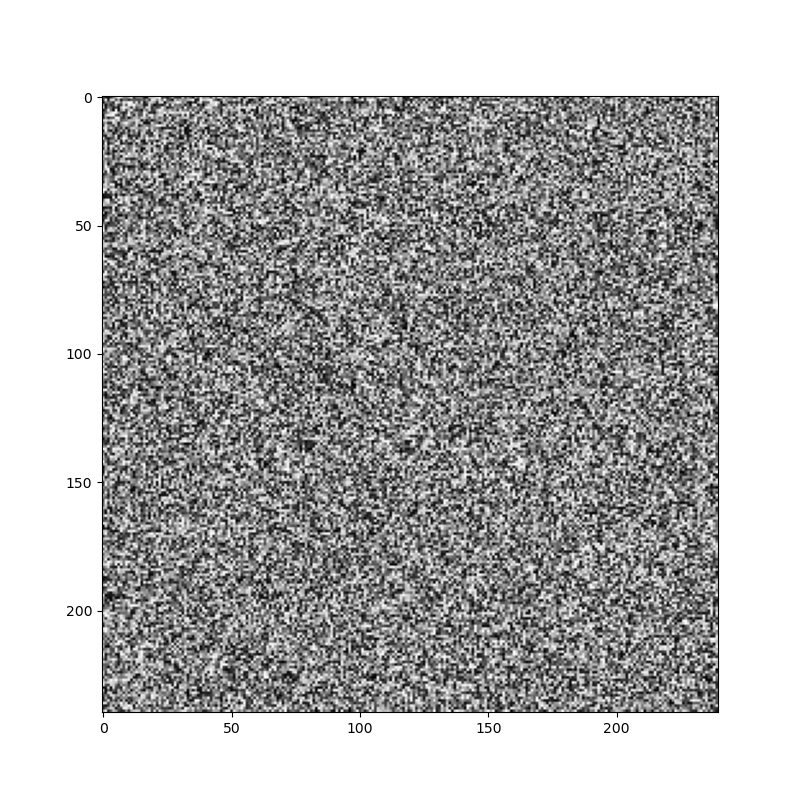

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(fine_noise,cmap='gray')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
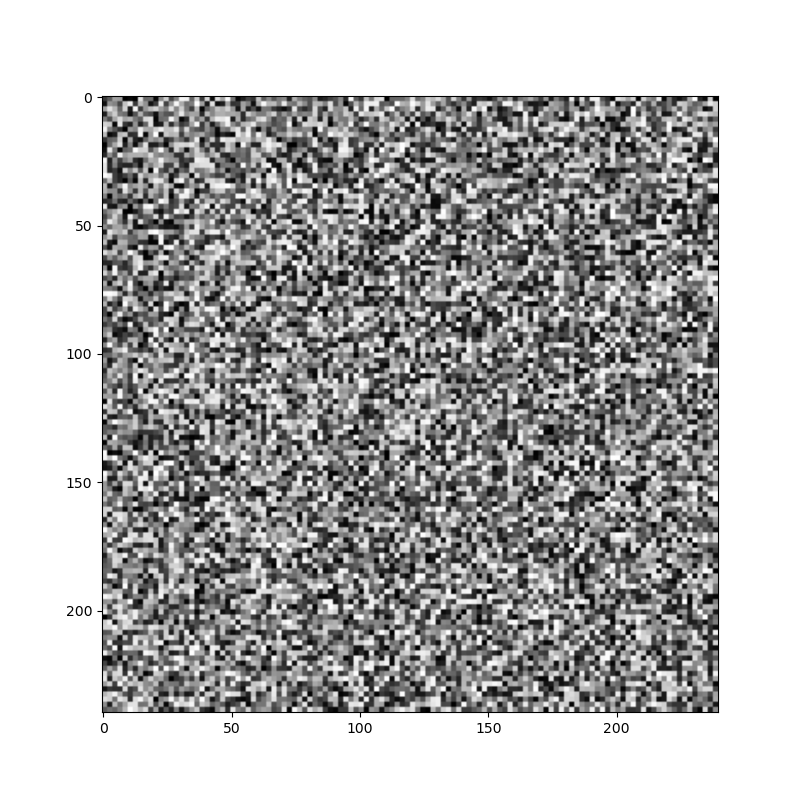

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(medium_noise,cmap='gray')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
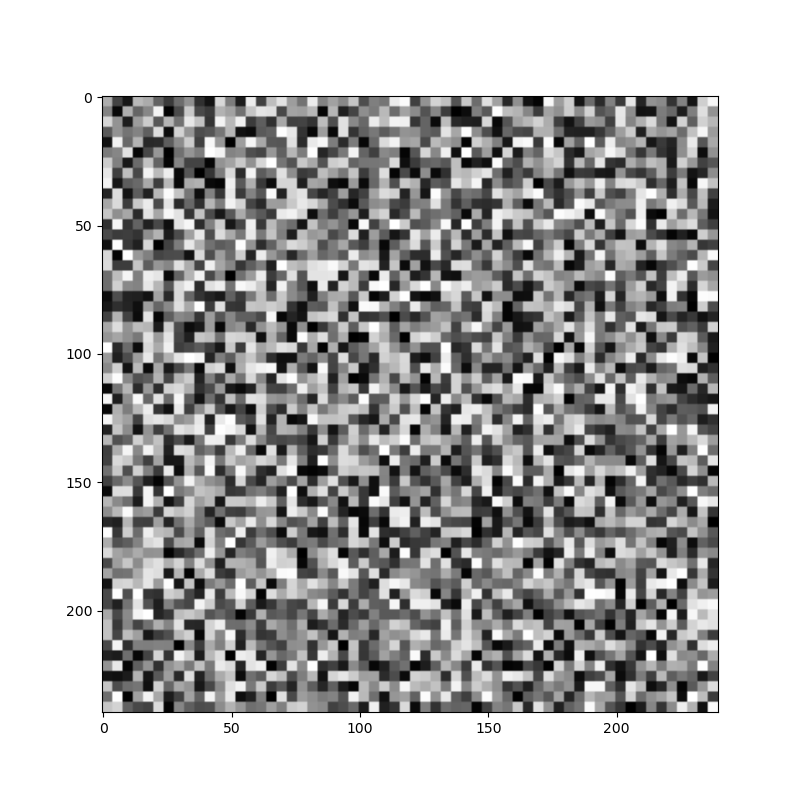

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(large_noise,cmap='gray')

In [18]:
from scipy.ndimage import gaussian_filter
very_large_noise = gaussian_filter(very_large_noise, sigma=4)
medium_noise = gaussian_filter(medium_noise, sigma=2)
large_noise = gaussian_filter(large_noise, sigma=3)
fine_noise = gaussian_filter(fine_noise, sigma=0)
result = matrix_average(matrix_average(matrix_average(fine_noise,medium_noise),large_noise),very_large_noise)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
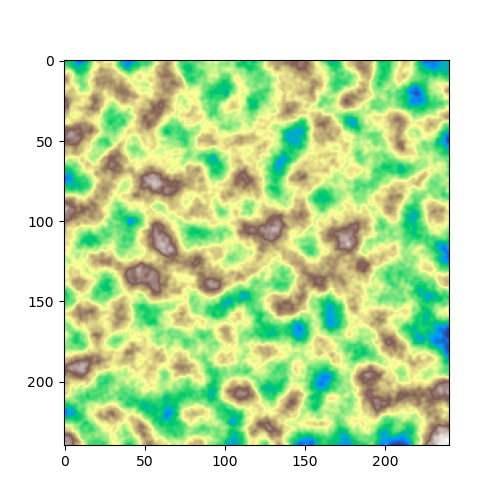

In [19]:
plt.figure(figsize=(5,5))
plt.imshow(result,cmap='terrain')

In [20]:
def water(x):
    if(x<0.3):
        return 0.3
    else:
        return x
water_vect = np.vectorize(water)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
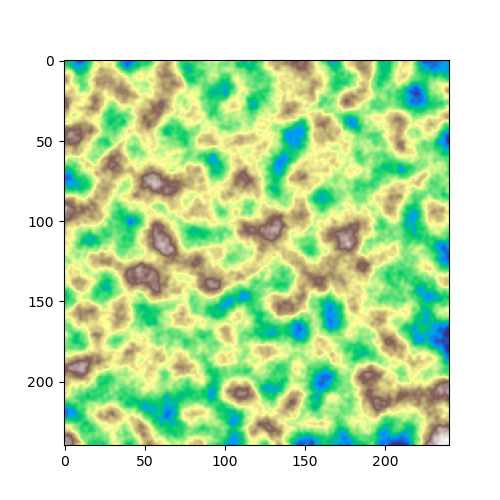

In [21]:
plt.figure(figsize=(5,5))
plt.imshow(water_vect(result),cmap='terrain')

In [15]:
#from google.colab import output
#output.enable_custom_widget_manager()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
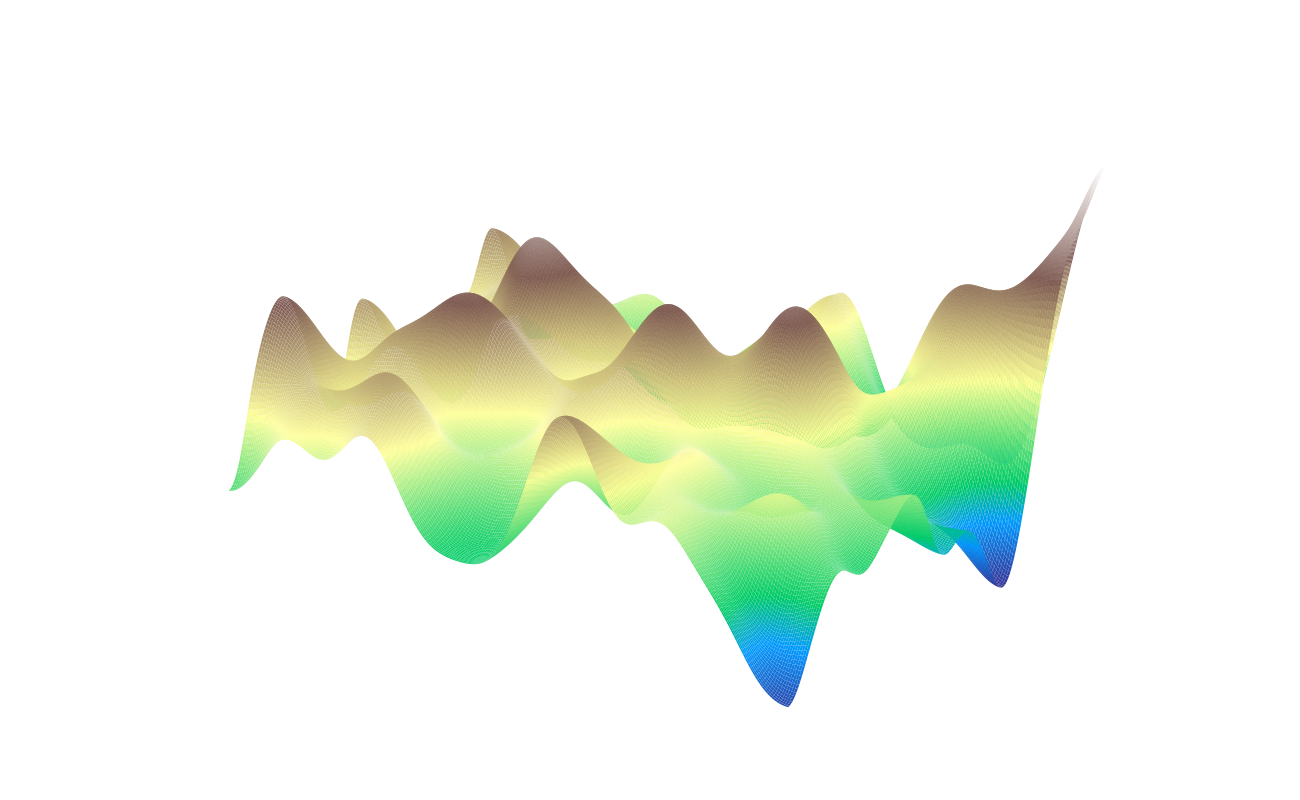

In [26]:
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm

fig = plt.figure(figsize=(13,8))
ax = Axes3D(fig)
# Hide grid lines
ax.grid(False)
plt.axis('off')
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
X = np.arange(0, dim, 1)
Y = np.arange(0, dim, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
ax.plot_surface(X, Y, gaussian_filter(water_vect(result), sigma=12), rstride=1, cstride=1, cmap='terrain',linewidth=1, antialiased=True)
plt.show()